In [91]:
import warnings
warnings.filterwarnings("ignore")
%pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,confusion_matrix,classification_report

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [92]:
df=pd.read_csv("loan_approval_dataset.csv")
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [93]:
df.columns = df.columns.str.strip()

In [94]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [96]:
df.shape

(4269, 13)

In [97]:
df.isnull().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [98]:
duplicates=df.duplicated()
print(f"the total number of duplicates is : {sum(duplicates)}\n")

the total number of duplicates is : 0



In [99]:
pd.DataFrame(df.describe(include="number").columns)

,0
0,loan_id
1,no_of_dependents
2,income_annum
3,loan_amount
4,loan_term
5,cibil_score
6,residential_assets_value
7,commercial_assets_value
8,luxury_assets_value
9,bank_asset_value


In [100]:
pd.DataFrame(df.describe(include="object").columns)

,0
0,education
1,self_employed
2,loan_status


In [101]:
categorical_cols=['education','self_employed','loan_status']
for col in categorical_cols:
    print(f'Value counts for {col}: \n {df[col].value_counts()}')

Value counts for education: 
 education
Graduate        2144
Not Graduate    2125
Name: count, dtype: int64
Value counts for self_employed: 
 self_employed
Yes    2150
No     2119
Name: count, dtype: int64
Value counts for loan_status: 
 loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64


In [102]:
numerical_cols=['loan_id','no_of_dependents','income_annum','loan_amount','loan_term','cibil_score','residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value']

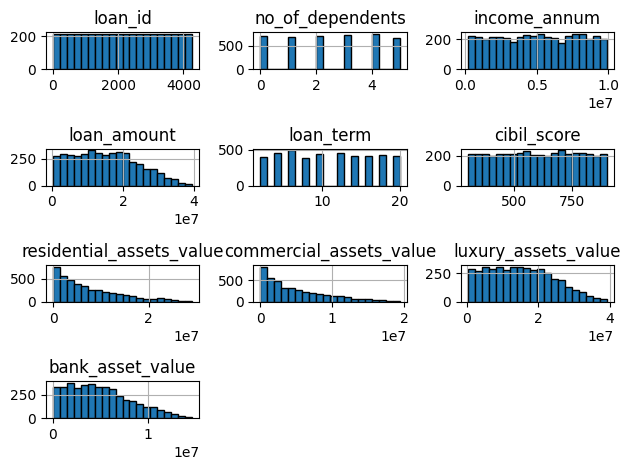

In [103]:
df.hist(bins=20,edgecolor="black")
plt.tight_layout()
plt.show()

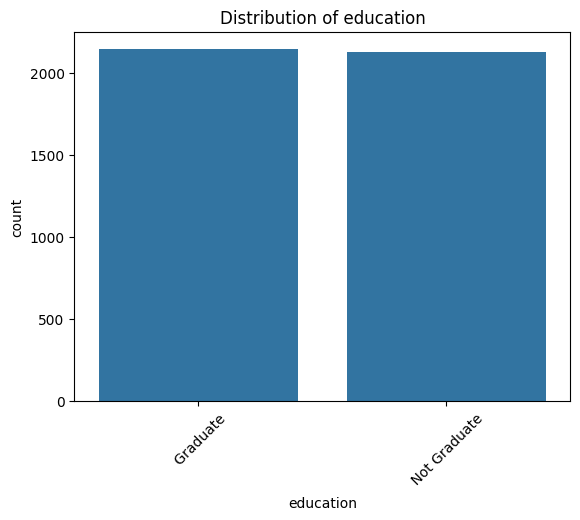

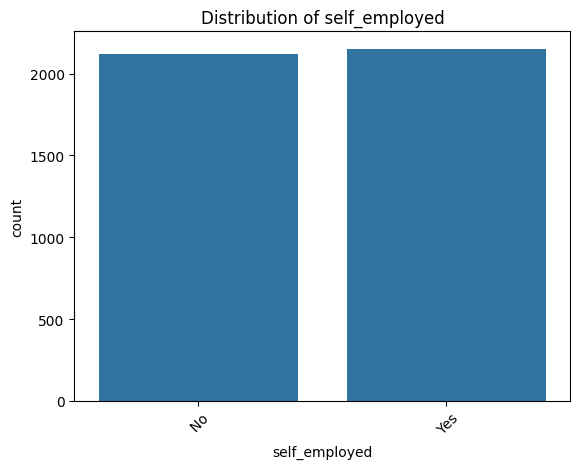

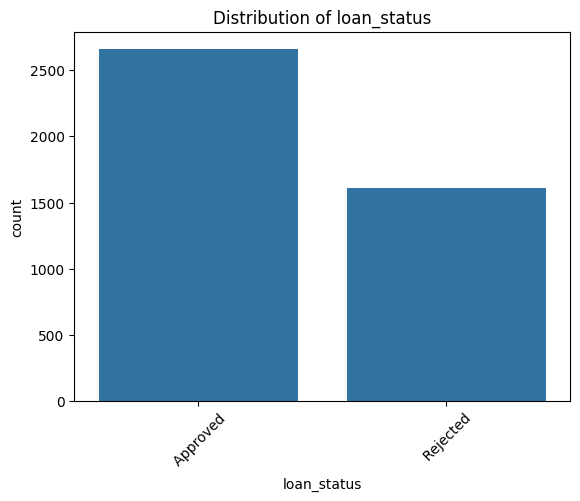

In [104]:
for col in categorical_cols:
    sns.countplot(data=df,x=col)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

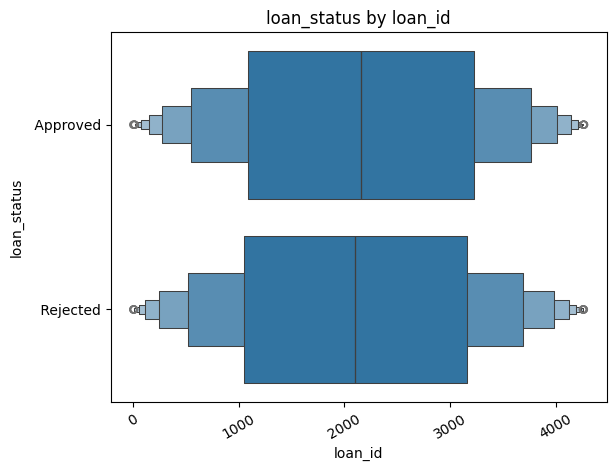

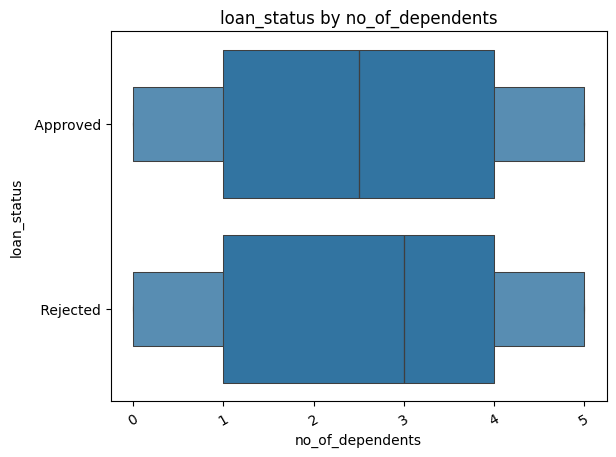

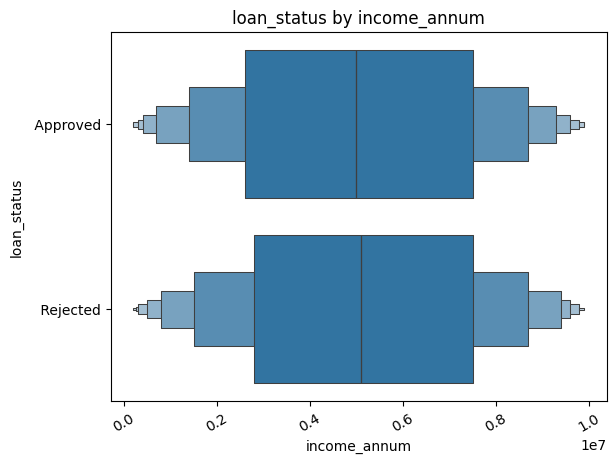

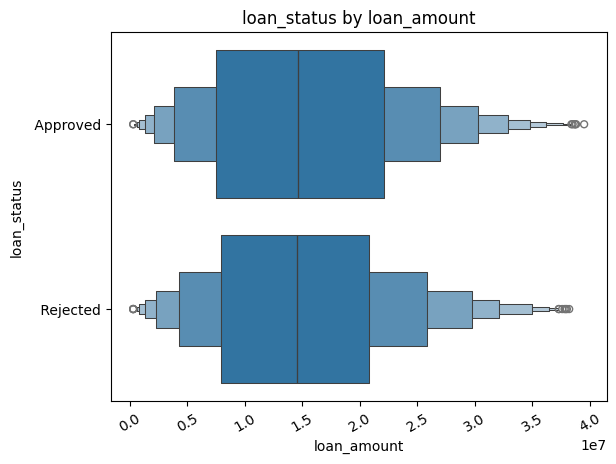

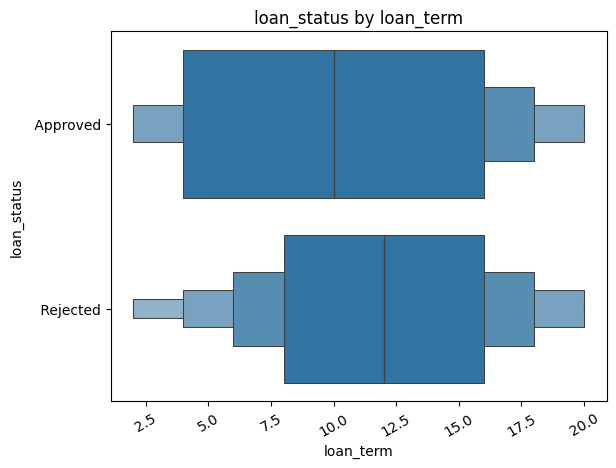

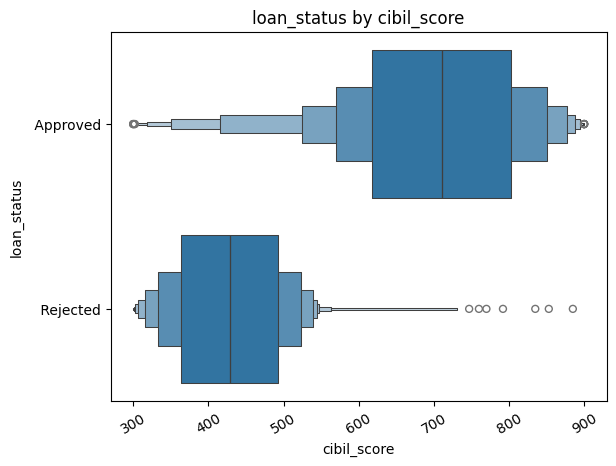

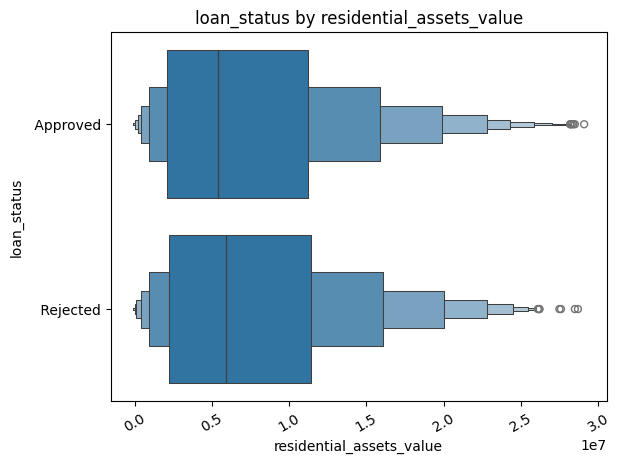

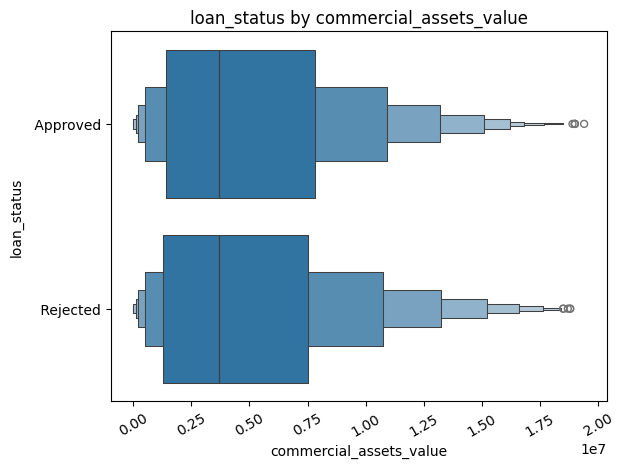

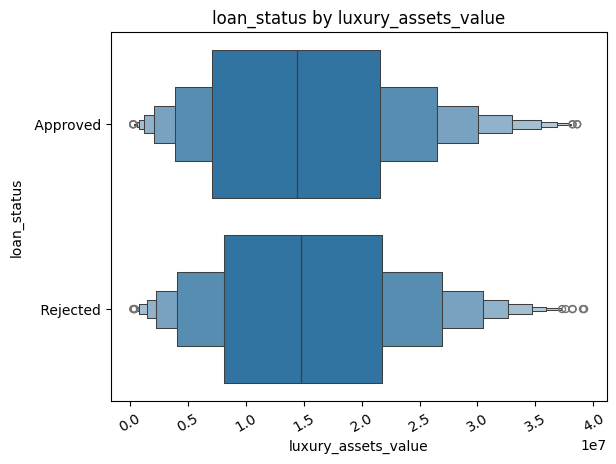

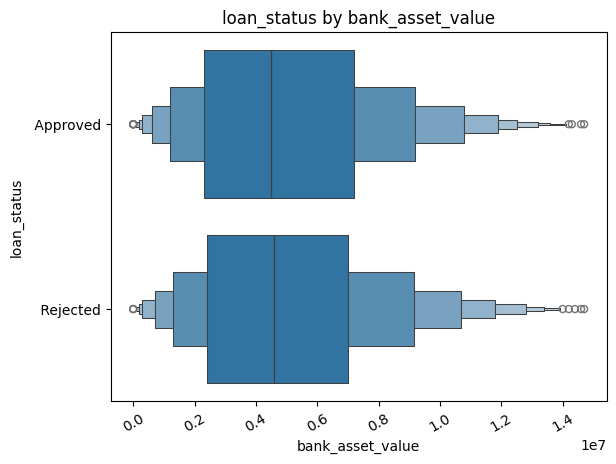

In [105]:
for col in numerical_cols:
    sns.boxenplot(data=df, x=col, y="loan_status")
    plt.title(f'loan_status by {col.strip()}')
    plt.xticks(rotation=30)
    plt.show()

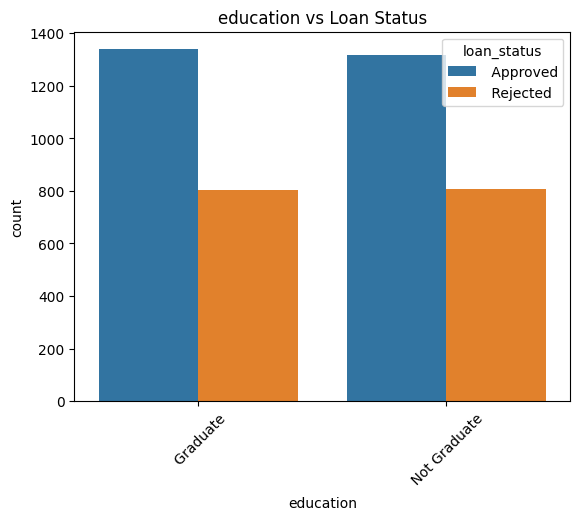

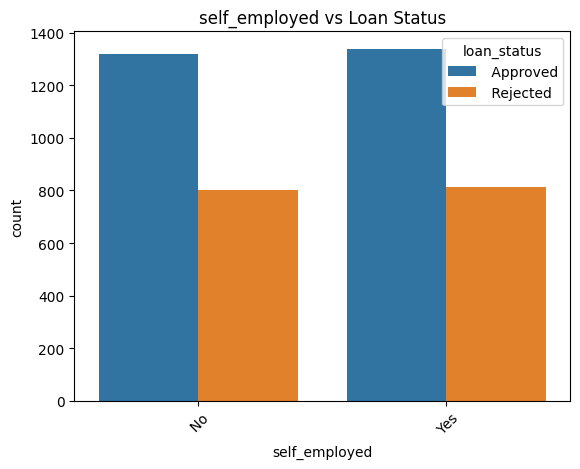

In [106]:
for col in categorical_cols:
    if col != 'loan_status':
        sns.countplot(data=df, x=col, hue='loan_status')
        plt.title(f'{col} vs Loan Status')
        plt.xticks(rotation=45)
        plt.show()

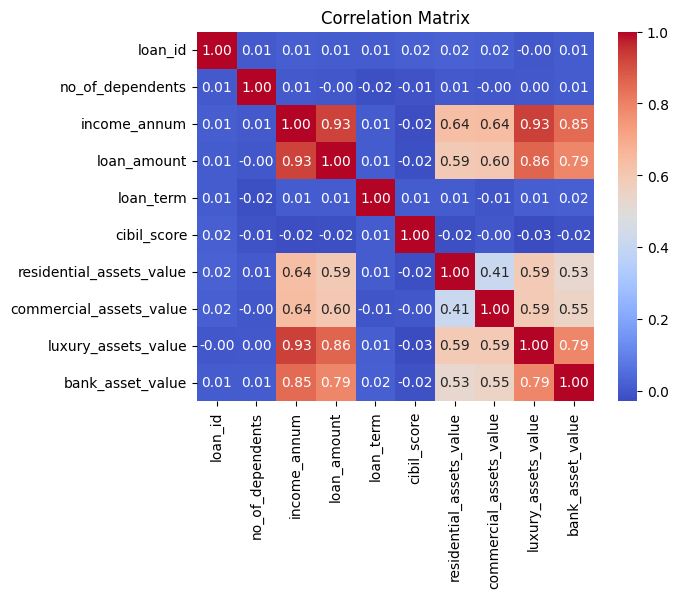

In [107]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [108]:
df.describe(include="number").columns

Index(['loan_id', 'no_of_dependents', 'income_annum', 'loan_amount',
       'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value'],
      dtype='object')

In [109]:
numeber_arr=['no_of_dependents', 'income_annum', 'loan_amount',
       'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']
for feature in numeber_arr:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df= df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

In [110]:
for col in df.select_dtypes(include=['number']).columns:
    print(col, df[col].min(), df[col].max())

loan_id 2 4269
no_of_dependents 0 5
income_annum 200000 9900000
loan_amount 300000 39500000
loan_term 2 20
cibil_score 300 900
residential_assets_value -100000 24900000
commercial_assets_value 0 17000000
luxury_assets_value 300000 39200000
bank_asset_value 0 14000000


In [111]:
features=['no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value']

In [112]:
target=df["loan_status"]

In [113]:
new_df = df[features + ['loan_status']].copy()
for col in new_df.columns:
    le = LabelEncoder()
    new_df[col] = le.fit_transform(new_df[col])

new_df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
1,0,1,1,39,119,3,117,28,22,85,33,1
2,3,0,0,89,294,9,206,72,45,330,127,1
3,3,0,0,80,304,3,167,183,33,230,79,1
4,5,1,1,96,239,9,82,125,82,291,50,1
5,0,0,1,46,132,4,19,69,83,134,51,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,0,1,8,20,5,17,29,5,30,8,1
4265,0,1,1,31,110,9,259,43,29,107,19,0
4266,2,1,0,63,236,8,157,13,124,178,73,1
4267,1,1,0,39,125,3,480,83,7,138,58,0


In [114]:
X=new_df.drop(["loan_status"],axis=1)
y=new_df["loan_status"]

In [115]:
X

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
1,0,1,1,39,119,3,117,28,22,85,33
2,3,0,0,89,294,9,206,72,45,330,127
3,3,0,0,80,304,3,167,183,33,230,79
4,5,1,1,96,239,9,82,125,82,291,50
5,0,0,1,46,132,4,19,69,83,134,51
...,...,...,...,...,...,...,...,...,...,...,...
4264,5,0,1,8,20,5,17,29,5,30,8
4265,0,1,1,31,110,9,259,43,29,107,19
4266,2,1,0,63,236,8,157,13,124,178,73
4267,1,1,0,39,125,3,480,83,7,138,58


In [116]:
pd.DataFrame(y)

,loan_status
1,1
2,1
3,1
4,1
5,1
...,...
4264,1
4265,0
4266,1
4267,0


In [117]:
for col in categorical_cols:
    unique_original = df[col].unique()
    unique_encoded = new_df[col].unique()
    mapping = {}
    for orig_val in unique_original:
        encoded_val = new_df[df[col] == orig_val][col].iloc[0]
        mapping[orig_val] = encoded_val
    print(f"Column: {col}")
    for orig, enc in mapping.items():
        print(f"  {orig} -> {enc}")
    print()

Column: education
   Not Graduate -> 1
   Graduate -> 0

Column: self_employed
   Yes -> 1
   No -> 0

Column: loan_status
   Rejected -> 1
   Approved -> 0



In [118]:
smote = SMOTE(random_state=42)

In [119]:
X_resampled, y_resampled = smote.fit_resample(X, y)

In [120]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

In [121]:
logistic_regression_model=LogisticRegression()

In [122]:
logistic_regression_model.fit(X_train, y_train)

LogisticRegression()

In [123]:
logistic_regression_y_pred=logistic_regression_model.predict(X_test)

In [124]:
logistic_regression_accuracy=accuracy_score(y_test,logistic_regression_y_pred)
logistic_regression_accuracy

0.8894230769230769

In [125]:
logistic_regression_f1_score=f1_score(y_test,logistic_regression_y_pred)
logistic_regression_f1_score

0.8891031822565092

In [126]:
logistic_regression_recall=recall_score(y_test,logistic_regression_y_pred)
logistic_regression_recall

0.8731060606060606

In [127]:
logistic_regression_percision=precision_score(y_test,logistic_regression_y_pred)
logistic_regression_percision

0.9056974459724951

In [128]:
logistic_regression_confusion_matrix=confusion_matrix(y_test,logistic_regression_y_pred)
logistic_regression_confusion_matrix

array([[464,  48],
       [ 67, 461]])

In [129]:
print(classification_report(y_test,logistic_regression_y_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       512
           1       0.91      0.87      0.89       528

    accuracy                           0.89      1040
   macro avg       0.89      0.89      0.89      1040
weighted avg       0.89      0.89      0.89      1040



In [130]:
knn_model=KNeighborsClassifier(n_neighbors=5)

In [131]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [132]:
knn_y_pred=knn_model.predict(X_test)

In [133]:
knn_accuracy=accuracy_score(y_test,knn_y_pred)
knn_accuracy

0.9538461538461539

In [134]:
knn_recall=recall_score(y_test,knn_y_pred)
knn_recall

0.9848484848484849

In [135]:
knn_f1_score=f1_score(y_test,knn_y_pred)
knn_f1_score

0.9558823529411765

In [136]:
knn_percision=precision_score(y_test,knn_y_pred)
knn_percision

0.9285714285714286

In [137]:
knn_confusion_matrix=confusion_matrix(y_test,knn_y_pred)
knn_confusion_matrix

array([[472,  40],
       [  8, 520]])

In [138]:
print(classification_report(y_test,knn_y_pred))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       512
           1       0.93      0.98      0.96       528

    accuracy                           0.95      1040
   macro avg       0.96      0.95      0.95      1040
weighted avg       0.96      0.95      0.95      1040



In [139]:
decision_tree_model=DecisionTreeClassifier()

In [140]:
decision_tree_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [141]:
decision_tree_y_pred=decision_tree_model.predict(X_test)

In [142]:
decision_tree_accuracy=accuracy_score(y_test,decision_tree_y_pred)
decision_tree_accuracy

0.9865384615384616

In [143]:
decision_tree_f1_score=f1_score(y_test,decision_tree_y_pred)
decision_tree_f1_score

0.9867924528301887

In [144]:
decision_tree_percision=precision_score(y_test,decision_tree_y_pred)
decision_tree_percision

0.9830827067669173

In [145]:
decision_tree_recall=recall_score(y_test,decision_tree_y_pred)
decision_tree_recall

0.990530303030303

In [146]:
decision_tree_confution_matrix=confusion_matrix(y_test,decision_tree_y_pred)
decision_tree_confution_matrix

array([[503,   9],
       [  5, 523]])

In [147]:
print(classification_report(y_test,decision_tree_y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       512
           1       0.98      0.99      0.99       528

    accuracy                           0.99      1040
   macro avg       0.99      0.99      0.99      1040
weighted avg       0.99      0.99      0.99      1040



In [148]:
random_forest_model = RandomForestClassifier(random_state=42)

In [149]:
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [150]:
random_forest_y_pred = random_forest_model.predict(X_test)

In [151]:
random_forest_accuracy = accuracy_score(y_test, random_forest_y_pred)
random_forest_accuracy

0.989423076923077

In [152]:
random_forest_f1_score = f1_score(y_test, random_forest_y_pred)
random_forest_f1_score

0.9896519285042333

In [153]:
random_forest_precision = precision_score(y_test, random_forest_y_pred)
random_forest_precision

0.983177570093458

In [154]:
random_forest_recall = recall_score(y_test, random_forest_y_pred)
random_forest_recall

0.9962121212121212

In [155]:
random_forest_confusion_matrix = confusion_matrix(y_test, random_forest_y_pred)
random_forest_confusion_matrix

array([[503,   9],
       [  2, 526]])

In [156]:
print(classification_report(y_test, random_forest_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       512
           1       0.98      1.00      0.99       528

    accuracy                           0.99      1040
   macro avg       0.99      0.99      0.99      1040
weighted avg       0.99      0.99      0.99      1040



In [157]:
svm_model = SVC(random_state=42)

In [158]:
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [159]:
svm_y_pred = svm_model.predict(X_test)

In [160]:
svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_accuracy

0.9528846153846153

In [161]:
svm_f1_score = f1_score(y_test, svm_y_pred)
svm_f1_score

0.9554950045413261

In [162]:
svm_precision = precision_score(y_test, svm_y_pred)
svm_precision

0.9179755671902269

In [163]:
svm_recall = recall_score(y_test, svm_y_pred)
svm_recall

0.9962121212121212

In [164]:
svm_confusion_matrix = confusion_matrix(y_test, svm_y_pred)
svm_confusion_matrix

array([[465,  47],
       [  2, 526]])

In [165]:
print(classification_report(y_test, svm_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95       512
           1       0.92      1.00      0.96       528

    accuracy                           0.95      1040
   macro avg       0.96      0.95      0.95      1040
weighted avg       0.96      0.95      0.95      1040



In [166]:
gb_model = GradientBoostingClassifier(random_state=42)

In [167]:
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [168]:
gb_y_pred = gb_model.predict(X_test)

In [169]:
gb_accuracy = accuracy_score(y_test, gb_y_pred)
gb_accuracy

0.9826923076923076

In [170]:
gb_f1_score = f1_score(y_test, gb_y_pred)
gb_f1_score

0.9830827067669173

In [171]:
gb_precision = precision_score(y_test, gb_y_pred)
gb_precision

0.9757462686567164

In [172]:
gb_recall = recall_score(y_test, gb_y_pred)
gb_recall

0.990530303030303

In [173]:
gb_confusion_matrix = confusion_matrix(y_test, gb_y_pred)
gb_confusion_matrix

array([[499,  13],
       [  5, 523]])

In [174]:
print(classification_report(y_test, gb_y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       512
           1       0.98      0.99      0.98       528

    accuracy                           0.98      1040
   macro avg       0.98      0.98      0.98      1040
weighted avg       0.98      0.98      0.98      1040



In [175]:
logistic_regression_model.fit(X, y)
knn_model.fit(X, y)
decision_tree_model.fit(X, y)
random_forest_model.fit(X, y)
svm_model.fit(X, y)
gb_model.fit(X, y)

GradientBoostingClassifier(random_state=42)

In [176]:
import joblib
joblib.dump(logistic_regression_model, "logistic_regression_model.joblib")
joblib.dump(knn_model, "knn_model.joblib")
joblib.dump(decision_tree_model, "decision_tree_model.joblib")
joblib.dump(random_forest_model, "random_forest_model.joblib")
joblib.dump(svm_model, "svm_model.joblib")
joblib.dump(gb_model, "gradient_boosting_model.joblib")

['gradient_boosting_model.joblib']